# __QMSS 5073 - Machine Learning Midterm__
## **Cindy Chen**

In [1]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np

import matplotlib.pyplot as mpl
import seaborn as sb

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### 1. Import the spam dataset and print the first six rows.  

In [3]:
spam_list = pd.read_csv('C:/Users/Cindy C/Documents/CINDY CHEN/2021 Prep/SCHOOL WORK/QMSS 5073 - Machine Learning/Midterm/spam_dataset.csv')
spam_list.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### 2. Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

### The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

The three variables in the data set that I think will be important indicators in a model for spam is:

* 'word_freq_3d:'
* 'word_freq_000:'
* 'word_freq_remove:'

I chose these three (3) variables through informed exploratory data analysis.  I took the mean frequency of each variable from the not_spam and actually_spam sets and calculated a relative difference between the two sets.  In identifying the largest absolute differences, I chose the top three variables as my candidates for investigation.  I believe this is a good preliminary approach to identifying potential independent variables candidates.

Two of these variables make sense to me intuitively.  The three zeros '000' suggest numbers in the thousands, potentially indicative of spam emails requesting money.  Meanwhile, the word "remove" might be distinct to spam emails about virus removal.  In terms of the frequency of the term "3d", it doesn't make sense intuitively but my data analysis tells me otherwise so I will explore this further in subsequent questions.

In [4]:
#Create two different dataframes based on whether they were spam or not spam.
#These data frames only show the mean frequency of each variable (I chose mean because I thought this was a good metric for comparison)
not_spam = pd.DataFrame(spam_list[spam_list['spam'] == 0].mean())
actually_spam = pd.DataFrame(spam_list[spam_list['spam'] == 1].mean())

#combine the two columns together
comparison = pd.concat([not_spam, actually_spam], axis = 1)

#rename the columns
comparison.columns = ['not_spam','actually_spam']

#I want a quick proxy for what might distinguish 'spam' from 'not spam'.  Accordingly, I am making a data
#frame that subtracts the absolute difference between the two means for each variable and divide by 'not spam'
#frequency so that I get a percentage difference between 'not_spam' and 'spam' messages. Sort from highest to
#smallest in distance.
comparison['difference'] = abs(comparison['not_spam'] - comparison['actually_spam']) / comparison['not_spam'] 

comparison = comparison.sort_values(by=['difference'], ascending = False)
comparison[1:11] #take top 10 variables (I removed the first row, because it is the dependent variable)

,not_spam,actually_spam,difference
word_freq_3d:,0.000886,0.164672,184.872477
word_freq_000:,0.007088,0.247055,33.857704
word_freq_remove:,0.009383,0.275405,28.351310
word_freq_credit:,0.007579,0.205521,26.117520
char_freq_$:,0.011648,0.174478,13.978608
word_freq_addresses:,0.008318,0.112079,12.474663
word_freq_money:,0.017138,0.212879,11.421667
word_freq_free:,0.073587,0.518362,6.044223
word_freq_business:,0.048346,0.287507,4.946800
capital_run_length_longest:,18.214491,104.393271,4.731331


 ### 3. Visualize the univariate distribution of each of the variables in the previous question.  

Histogram for the Term "3d"

Text(0.5, 1.0, 'Histogram of the word "3D"')

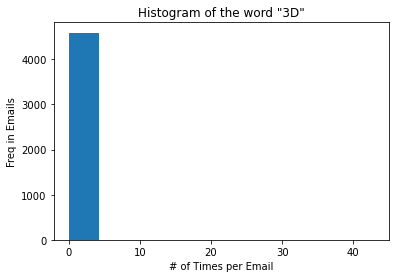

In [18]:
mpl.hist(spam_list['word_freq_3d:'])
mpl.ylabel('Freq in Emails')
mpl.xlabel('# of Times per Email')
mpl.title('Histogram of the word "3D"')

Histogram for the Term "000"

Text(0.5, 1.0, 'Histogram of the Word "000"')

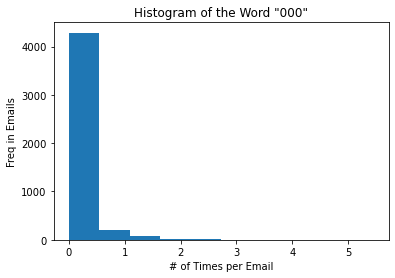

In [19]:
mpl.hist(spam_list['word_freq_000:'])
mpl.ylabel('Freq in Emails')
mpl.xlabel('# of Times per Email')
mpl.title('Histogram of the Word "000"')

Histogram for the Frequency of the word "Remove"

Text(0.5, 1.0, 'Histogram of the Word "Remove"')

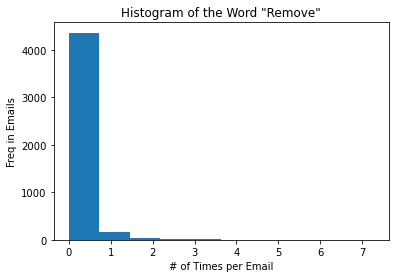

In [20]:
mpl.hist(spam_list['word_freq_remove:'])
mpl.ylabel('Freq in Emails')
mpl.xlabel('# of Times per Email')
mpl.title('Histogram of the Word "Remove"')

### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

To predict dependent variables like "spam", where the outcome is a binary, we are most interested in the supervised learning models used for classification.  In that case:

**KNN Classifier**

**Logistic Regression** 

**Decision Trees**

**Bagged Trees (ensemble trees)**

**Random Forest**

### 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

> A training set is a subset of our existing data that enables us to build and fit our models.  Typically, the training data is much larger than the test data in terms of observations to aid in model development and refinement.  In the scikit-learn package, 75% of the data is allocated to the training set and the remainder is allocated to the test set.

> Meanwhile, the test data allows us to trust our predictions and ensure that our model can generalize well on new, unseen data. Beyond testing for accuracy, we also want to evaluate the risk of overfitting and underfitting; the ability to compare our training and test results helps us determine if this is occurring and we can fix our models if necessary.  After all, the purpose of machine learning is not to simply to predict well on existing data: we ultimately want to apply our model to new situations and ensure it's scalable.

> If we didn't separate our data into subsets, our understanding of our model performance would be incomplete and we would likely think it's predicting better than it actually was.  Separating our data into two subsets as defined above offers us a robust evaluation of our model using the data that's available to us.

### 6. What is k-fold cross validation and what do we use it for?

> K-fold cross validation involves dividing our data set into 'k' number of parts (typically 5 or 10), where k-1 parts are used to train our model and the remaining part is designated as test data after we've finalized our model.  We then repeat the process k times where our training and test sets are composed of different combinations of our folds.  In repeatedly splitting the data and training models, we ensure that the accuracy scores generated by our model are not outliers or skewed by a matter of chance.  In repeatedly evaluating our model's results on different iterations of our data, we can become more confident and accurate in our model's performance (whether we're evaluating on accuracy or another metric like R-squared). In all, k-fold cross validation is a more robust way to measure our model's generalized performance.

### 7. How is k-fold cross validation different from stratified k-fold cross validation?

> Stratified k-fold cross validation differs from k-fold cross validation in that its folds exhibit consistent class proportions that are representative of the entire data set. For instance, if your data consists of 50% women and 50% men, each fold for training and testing will exhibit those same proportions. Meanwhile, simple k-fold cross validation does not make sure that each fold is representative of all classes in the data. In other words, k-fold cross validation does not do stratified sampling.

> Stratified k-fold cross validation helps maximize accuracy in our model and avoid the creation of a model that doesn't classify certain groups adequately, because certain groups may be missing or insufficiently represented in the k-folds.

### 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.

**Answer:**

> The first model I ran was KNN classifier.  I chose the number of folds through trial and error, ranging from 5 to 10.  When I noticed that my train/test scores as well as the number of neighbors were consistently appearing, I decided to choose 10.

> In terms of the optimal number of neighbors, I ran three iterations of GridSearchCV.  In two of my three trials, it recommended 12 neighbors and all three trials generated the same accuracy scores for test and training sets.  Accordingly, I decided to go with 12 neighbors as the ideal parameter, since this parameter appeared in two out of the three trials (with and without GridSearchCV).


> When I evaluated my model on test data directly using the best parameter of n_neighbors = 12, I attained a test score of 0.825. 


> When I experimented with shuffled k-fold, stratified-kfold, and the standard 10-fold cross-validation, the test score and cross-validation performance did not change, evident in the printed results below.  In each of these iterations, I attained a score of 0.817.





Step 1: Prepare my data

In [5]:
#set up my X and y datasets
X = spam_list.loc[:, ['word_freq_3d:', 'word_freq_000:', 'word_freq_remove:']]
y = spam_list['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

#I want to inspect the dimensions of my train_test_split to make sure that it's working appropriately
view_dimension = [X_train.shape, X_test.shape, y_train.shape, y_test.shape]
print(view_dimension)

[(3450, 3), (1151, 3), (3450,), (1151,)]


In [22]:
X_train.head(10)

,word_freq_3d:,word_freq_000:,word_freq_remove:
2864,0.00,0.0,0.00
1667,0.00,0.0,0.16
2682,0.00,0.0,0.00
647,0.00,0.0,0.00
935,40.13,0.0,0.00
4016,0.00,0.0,0.00
3595,0.00,0.0,0.00
4299,0.00,0.0,0.00
3477,0.00,0.0,0.00
579,0.00,0.0,0.00


Step 2: Preprocess/scale my data before I fit it to a model

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

#scale my training and test X data
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 3: Fit scaled data to KNN Classifier, use 10-fold cross validation

In [24]:
knn_classifier = KNeighborsClassifier().fit(X_scaled, y_train)

#Print the model performance scores based on default parameters
print("default train scores {:.3f}".format(knn_classifier.score(X_scaled, y_train)))
print("default test scores {:.3f}".format(knn_classifier.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_scaled, y_train, scoring="accuracy"))))

#set up parameters for my param grid
param_grid = {'n_neighbors': np.arange(1, 20, 1)}

#run GridSearchCV
knn_gridmodel = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
knn_gridmodel.fit(X_scaled, y_train)

#Print training, test, cross-validation scores as well as best parameters
print('\nUsing GridSearchCV with 10-fold cross-validation')
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel.best_score_))
print("best parameters: {}".format(knn_gridmodel.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel.score(X_test_scaled, y_test)))

default train scores 0.404
default test scores 0.381
CV Mean Score: 0.731

Using GridSearchCV with 10-fold cross-validation
best mean cross-validation score: 0.817
best parameters: {'n_neighbors': 12}
CV Mean Score using Best Parameters: 0.817
test-set score: 0.825


Step 4: Repeat with KNN Classifier but try shuffled kfold and stratified kfold to see if results differ significantly.

In [25]:
#set up stratified and shuffling variables
skfold = StratifiedKFold(n_splits=10)
kfold = KFold(n_splits=10, shuffle=True, random_state = 50)

#rerun GridSearchCV on stratified and shuffled methods
param_grid = {'n_neighbors': np.arange(1, 20, 1)}
knn_gridmodel_kfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
knn_gridmodel_skfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)

#fit the models
knn_gridmodel_kfold.fit(X_scaled, y_train)
knn_gridmodel_skfold.fit(X_scaled, y_train)

#print the performance results and best parameters
print("\nShuffled K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_kfold.best_score_))
print("best parameters: {}".format(knn_gridmodel_kfold.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_kfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel_kfold.score(X_test_scaled, y_test)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_skfold.best_score_))
print("best parameters: {}".format(knn_gridmodel_skfold.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_skfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel_skfold.score(X_test_scaled, y_test)))


Shuffled K-Fold Scores
best mean cross-validation score: 0.818
best parameters: {'n_neighbors': 16}
CV Mean Score using Best Parameters: 0.816
test-set score: 0.825

Stratified K-Fold Scores
best mean cross-validation score: 0.817
best parameters: {'n_neighbors': 12}
CV Mean Score using Best Parameters: 0.817
test-set score: 0.825


### 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

> The second model I ran was a Bagging Classifier in conjunction with Decision Tree Classifier, where I explored the performance between scaled and unscaled data, as well as different parameters such as  penalty types.  I also tried shuffling and stratifying the data to generate more scores for comparison.  Since I noticed that my scaled and unscaled data results yielded identical scores, I decided to use scaled data for the rest of my analysis. 

> Overall, my bagging classifier did not perform better than my KNN Classifier even when I ran GridSearchCV, because the test set score and the cross-validation scores did not yield higher scores.  The best parameters I found were a tree size of 100 with a max_sample value of 0.1.  My best test score was 0.824 and my best cross-validation mean score was 0.816, which was an improvement from the default parameters but not better than my KNN Classifier.  Since this score was still better than the scores after shuffling and stratifying my data, I decided that the method that yielded the parameters with the highest scores would be my chosen parameters.

> While I explored particular parameters, I limited my exploration to a few parameters due to processing time constraints.  Since I noticed an accuracy score improvement after running GridSearchCV on select parameters, I considered the analysis sufficient and moved forward with the parameters identified in the previous paragraph.

Step 1: I will now run a BaggingClassifier in conjunction with DecisionTreeClassifier() using default parameters

In [26]:
tree = DecisionTreeClassifier() #instantiate model type
bag = BaggingClassifier(tree, n_estimators=100)
bag.fit(X_scaled, y_train)

print('SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(bag.score(X_scaled, y_train)))
print('default test score: {:.3f}'.format(bag.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(), X_scaled, y_train, scoring="accuracy"))))

print('\nUNSCALED DATA RESULTS')
bag_unscaled = BaggingClassifier(tree, n_estimators=100)
bag_unscaled.fit(X_train, y_train)
print('default train score: {:.3f}'.format(bag_unscaled.score(X_train, y_train)))
print('default test score: {:.3f}'.format(bag_unscaled.score(X_test, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(), X_train, y_train, scoring="accuracy"))))

SCALED DATA RESULTS
default train score: 0.825
default test score: 0.817
CV Mean Score: 0.808

UNSCALED DATA RESULTS
default train score: 0.825
default test score: 0.818
CV Mean Score: 0.809


Step 2: I will now repeat my BaggingClassifier GridSearchCV but exploring more penalty types under the Saga solver.

In [43]:
#set up param grid
param_grid = {'n_estimators': np.arange(100, 300, 50), 'max_samples': [0.01, 0.1, 1]}

#run GridSearchCV
bag_scaled = GridSearchCV(BaggingClassifier(base_estimator = DecisionTreeClassifier()), param_grid=param_grid, cv=10)
bag_scaled.fit(X_train, y_train)

#Print performance of GridSearchCV
print("best mean cross-validation score: {:.3f}".format(bag_scaled.best_score_))
print("best parameters: {}".format(bag_scaled.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(base_estimator = DecisionTreeClassifier(), **bag_scaled.best_params_), X_train, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(bag_scaled.score(X_test, y_test)))

best mean cross-validation score: 0.817
best parameters: {'max_samples': 0.1, 'n_estimators': 100}
CV Mean Score using Best Parameters: 0.816
test-set score: 0.824


Step 3: I will now run stratified k-fold and shuffled k-fold to see if my results improve.

In [46]:
param_grid = {'n_estimators': np.arange(100, 300, 50), 'max_samples': [0.01, 0.1, 1]}

#set up gridsearchcv parameters
bag_scaled_kfold = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=param_grid, cv=kfold)
bag_scaled_skfold = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=param_grid, cv=skfold)

#fit the models
bag_scaled_kfold.fit(X_train, y_train)
bag_scaled_skfold.fit(X_train, y_train)

#Print the Performance Metrics for Shuffled and Stratified KFold
print("\nShuffled K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(bag_scaled_kfold.best_score_))
print("best parameters: {}".format(bag_scaled_kfold.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(DecisionTreeClassifier(), **bag_scaled_kfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(bag_scaled_kfold.score(X_test_scaled, y_test)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(bag_scaled_skfold.best_score_))
print("best parameters: {}".format(bag_scaled_skfold.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(DecisionTreeClassifier(), **bag_scaled_skfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(bag_scaled_skfold.score(X_test_scaled, y_test)))


Shuffled K-Fold Scores
best mean cross-validation score: 0.817
best parameters: {'max_samples': 0.1, 'n_estimators': 250}
CV Mean Score with Best Parameters: 0.817
test-set score: 0.818

Stratified K-Fold Scores
best mean cross-validation score: 0.817
best parameters: {'max_samples': 0.1, 'n_estimators': 100}
CV Mean Score with Best Parameters: 0.816
test-set score: 0.819


### 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

> My third model was a Random Forest.  My results were very close but ultimately not better than my KNN Classifier as my best test result was 0.824 and my best mean CV score was 0.818.  When I employed shuffling and stratified k-fold, my results did not improve my results from my initial GridSearchCV and were in fact slightly worse.

> Through GridSearchCV, I found that the best parameters for my Random Forest Classifier were a 'gini' criterion, using a max depth of 2, and using 150 trees). Since my cross-validation training scores and test scores were higher than the default values, I decided to move forward with these parameters. When my shuffled and stratified cross-validation scenarios resulted in lower mean CV scores and test scores than my initial GridSearchCV model, I decided move forward with the best parameters of my original GridSearchCV.

> While I acknowledged that there are many parameters that we can adjust for Random Forest, I focused on three parameters rather than the entire suite due to the computing power and time that it takes to run a Random Forest.

Step 1: set up Random Forest; my scaled test results were slightly better so I will use scaled data for my Random Forest Classifier going forward.

In [47]:
random_forest_scaled = RandomForestClassifier(n_estimators=200)
random_forest_scaled.fit(X_scaled, y_train)

print('SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(random_forest_scaled.score(X_scaled, y_train)))
print('default test score: {:.3f}'.format(random_forest_scaled.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(), X_scaled, y_train, scoring="accuracy"))))

print('\nUNSCALED DATA RESULTS')
random_forest_unscaled = RandomForestClassifier(n_estimators=200)
random_forest_unscaled.fit(X_train, y_train)
print('default train score: {:.3f}'.format(random_forest_unscaled.score(X_train, y_train)))
print('default test score: {:.3f}'.format(random_forest_unscaled.score(X_test, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(), X_train, y_train, scoring="accuracy"))))

SCALED DATA RESULTS
default train score: 0.825
default test score: 0.818
CV Mean Score: 0.810

UNSCALED DATA RESULTS
default train score: 0.825
default test score: 0.819
CV Mean Score: 0.809


Step 2: Use GridSearchCV to find parameters that maximize my accuracy score.

In [48]:
param_grid = {'n_estimators': np.arange(100, 500, 50), 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 8, 1)}
random_forest_2 = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
random_forest_2.fit(X_scaled, y_train)

#Print the performance of GridSearchCV
print("best mean cross-validation score: {:.3f}".format(random_forest_2.best_score_))
print("best parameters: {}".format(random_forest_2.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(**random_forest_2.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(random_forest_2.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.818
best parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 150}
CV Mean Score: 0.818
test-set score: 0.824


Step 3: Rerun GridSearchCV to find the best parameters, but also employ shuffling and stratified kfold methods to see if that alters my classifier performance.

In [49]:
param_grid = {'n_estimators': np.arange(100, 500, 50), 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 8, 1)}

#set up GridSearchCV parameters
rand_forest_kfold = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=kfold)
rand_forest_skfold = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=skfold)

#fit the models
rand_forest_kfold.fit(X_train, y_train)
rand_forest_skfold.fit(X_train, y_train)

#Print results of Shuffled and Stratified GridSearchCV models
print("\nShuffled K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(rand_forest_kfold.best_score_))
print("best parameters: {}".format(rand_forest_kfold.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(**rand_forest_kfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(rand_forest_kfold.score(X_test_scaled, y_test)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(rand_forest_skfold.best_score_))
print("best parameters: {}".format(rand_forest_skfold.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(**rand_forest_skfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(rand_forest_skfold.score(X_test_scaled, y_test)))


Shuffled K-Fold Scores
best mean cross-validation score: 0.818
best parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 350}
CV Mean Score: 0.818
test-set score: 0.818

Stratified K-Fold Scores
best mean cross-validation score: 0.818
best parameters: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}
CV Mean Score: 0.817
test-set score: 0.818


### 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

> My fourth model is a SVC (support vector classifier).  It did not perform better than my KNN Classifier or my Random Forest, because my best cross-validated mean score stood at 0.816 while my test score was 0.823.  In fact, my Random Forest performance metrics were the same as my Bagging Classifier. I did notice that my scaled data results yielded a slightly better test, so I decided to scale my data in my subsequent SVC analyses.

> Its best parameters were a kernel of "rbf" type, a gamma equal to 'scale', and a C parameter of 3. Shuffling my data yielded different ideal C value of 2, but since my default GridSearchCV and my stratified models yielded an ideal parameter of 3, I went with 3 as the ideal parameter since it appeared twice out of three attempts.   While I wanted to run a larger range of C values as part of GridSearchCV, I was constrained by the speed of performance and decided to limit the range. 

Step 1: Use default parameters on scaled and unscaled data to see initial results.

In [50]:
#Run for the default kernel of "rbf"
#fit SVC on scaled data
svc_scaled = SVC(kernel = "rbf", C = 1)
svc_scaled.fit(X_scaled, y_train)

print('RBF SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(svc_scaled.score(X_scaled, y_train)))
print('default test score: {:.3f}'.format(svc_scaled.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(), X_scaled, y_train, scoring="accuracy"))))\

#fit SVC on unscaled data
print('\nRBF UNSCALED DATA RESULTS')
svc_unscaled = SVC(kernel = "rbf", C = 1)
svc_unscaled.fit(X_train, y_train)
print('default train score: {:.3f}'.format(svc_unscaled.score(X_train, y_train)))
print('default test score: {:.3f}'.format(svc_unscaled.score(X_test, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(), X_scaled, y_train, scoring="accuracy"))))

RBF SCALED DATA RESULTS
default train score: 0.814
default test score: 0.822
CV Mean Score: 0.814

RBF UNSCALED DATA RESULTS
default train score: 0.808
default test score: 0.814
CV Mean Score: 0.814


In [51]:
#Run for the kernel for 'linear' to see if there is a difference

#fit SVC on scaled data
svc_scaled = SVC(kernel = "linear", C = 1)
svc_scaled.fit(X_scaled, y_train)

print('LINEAR SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(svc_scaled.score(X_scaled, y_train)))
print('default test score: {:.3f}'.format(svc_scaled.score(X_test_scaled, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(), X_scaled, y_train, scoring="accuracy"))))\

#fit SVC classifier on unscaled data
print('\nLINEAR UNSCALED DATA RESULTS')
svc_unscaled = SVC(kernel = "linear", C = 1)
svc_unscaled.fit(X_train, y_train)
print('default train score: {:.3f}'.format(svc_unscaled.score(X_train, y_train)))
print('default test score: {:.3f}'.format(svc_unscaled.score(X_test, y_test)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(), X_scaled, y_train, scoring="accuracy"))))

LINEAR SCALED DATA RESULTS
default train score: 0.807
default test score: 0.813
CV Mean Score: 0.814

LINEAR UNSCALED DATA RESULTS
default train score: 0.805
default test score: 0.811
CV Mean Score: 0.814


Step 2: Run GridSearchCV to identify parameters that will maximize my classifier performance.  Since it takes so long to run GridSearchCV, I limited the scope of my search to one type of parameter each time and chose the best performing model out of the single parameter that I adjusted.  Combining parameters took too long to run.

In [52]:
#set up param grid
param_grid = {'gamma': ['scale', 'auto']}

#fit the model
svc_2 = GridSearchCV(SVC(kernel = "rbf"), param_grid=param_grid, cv=10)
svc_2.fit(X_scaled, y_train)

#print scores
print("best mean cross-validation score: {:.3f}".format(svc_2.best_score_))
print("best parameters: {}".format(svc_2.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_2.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_2.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.814
best parameters: {'gamma': 'scale'}
CV Mean Score with Best Parameters: 0.814
test-set score: 0.822


In [62]:
#set up param grid
param_grid = {'C': np.arange(-5, 5, 1)}

#fit the model
svc_2 = GridSearchCV(SVC(gamma = 'scale', kernel = "rbf"), param_grid=param_grid, cv=10)
svc_2.fit(X_scaled, y_train)

#print scores
print("best mean cross-validation score: {:.3f}".format(svc_2.best_score_))
print("best parameters: {}".format(svc_2.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_2.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_2.score(X_test_scaled, y_test)))

C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning

best mean cross-validation score: 0.816
best parameters: {'C': 3}
CV Mean Score with Best Parameters: 0.816
test-set score: 0.823


Step 3: Rerun GridSearchCV using shuffling and stratifying in case there are any improvements.

In [53]:
param_grid = {'C': np.arange(-5, 5, 1)}
skfold = StratifiedKFold(n_splits=10)
kfold = KFold(n_splits=10, shuffle=True, random_state = 50)

#set up gridsearchcv parameters
svc_kfold = GridSearchCV(SVC(gamma = 'scale', kernel = "rbf"), param_grid=param_grid, cv=kfold)
svc_skfold = GridSearchCV(SVC(gamma = 'scale', kernel = "rbf"), param_grid=param_grid, cv=skfold)

#fit the models
svc_kfold.fit(X_scaled, y_train)
svc_skfold.fit(X_scaled, y_train)

#Print the scores for Shuffled and Stratified KFold
print("\nShuffled K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(svc_kfold.best_score_))
print("best parameters: {}".format(svc_kfold.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_kfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_kfold.score(X_test_scaled, y_test)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(svc_skfold.best_score_))
print("best parameters: {}".format(svc_skfold.best_params_))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_skfold.best_params_), X_scaled, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_skfold.score(X_test_scaled, y_test)))

C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning


Shuffled K-Fold Scores
best mean cross-validation score: 0.816
best parameters: {'C': 2}
CV Mean Score: 0.815
test-set score: 0.823

Stratified K-Fold Scores
best mean cross-validation score: 0.816
best parameters: {'C': 3}
CV Mean Score: 0.816
test-set score: 0.823


### 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?

**ANSWER:**

> I have added the three additional variables of 'word_freq_credit:', 'char_freq_$', and 'word_freq_addresses:', which were the next top three independent variables that I identified in my exploratory data analysis in Question 2.

> I would expect the addition of three variables to increase prediction accuracy because the number of variables compared to my data size is still very small. These additional variables will hopefully capture additional patterns in spam emails that my three initial variables don't cover.  While I believe that 'char_freq_\\$' and 'word_freq_000' might be somewhat correlated since we often mention thousands in reference to money, I believe that they are not perfectly collinear and thus, the introduction of 'char_freq_\$' will help my prediction.

> ***Results:*** With the addition of three variables, my KNN Classifier improved its test accuracy from 0.825 to 0.861.  In terms of its cross-validated training score using the best parameters, it improved from 0.817 to 0.861.  Interestingly, the ideal parameters changed from 12 neighbors to 7 neighbors.  Although my shuffled 5-fold GridSearchCV method yielded a slightly higher test score using a parameter of 5 neighbors, I chose 7 as my final neighbor count because the mean cross-validated training score was lower on the shuffled model that employed 5 neighbors.  Since my original GridSearchCV and stratified models both recommended 7 neighbors, I went with the majority vote.

Step 1: Create new training and test sets now with additional variables

In [7]:
#set up my X and y datasets
X_6var = spam_list.loc[:, ['word_freq_3d:', 'word_freq_000:', 'word_freq_remove:', 'word_freq_credit:', 'char_freq_$:', 'word_freq_addresses:']]
y = spam_list['spam']

X_train_6var, X_test_6var, y_train_6var, y_test_6var = train_test_split(X_6var, y, random_state = 50)

#I want to inspect the dimensions of my train_test_split to make sure that it's working appropriately
view_dimension = [X_train_6var.shape, X_test_6var.shape, y_train_6var.shape, y_test_6var.shape]
print(view_dimension)

[(3450, 6), (1151, 6), (3450,), (1151,)]


Step 2: Scale data

In [8]:
scaler = StandardScaler()
scaler.fit(X_train_6var)
X_train_scaled_6var = scaler.transform(X_train_6var)
X_test_scaled_6var = scaler.transform(X_test_6var)

view_dimension = [X_train_scaled_6var.shape, X_test_scaled_6var.shape]
print(view_dimension)

[(3450, 6), (1151, 6)]


Step 3: Run KNNClassifier with the six variables to see if model performance improves from before.

In [9]:
param_grid = {'n_neighbors': np.arange(5, 18, 2)} #use step of 2 to ensure that neighbors are always odd
knn_classifier_6var = KNeighborsClassifier().fit(X_train_scaled_6var, y_train_6var)

print("default train scores {:.3f}".format(knn_classifier_6var.score(X_train_scaled_6var, y_train_6var)))
print("default test scores {:.3f}".format(knn_classifier_6var.score(X_test_scaled_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))

knn_gridmodel_6var = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)

#use meta model methods to fit score and predict model:
knn_gridmodel_6var.fit(X_train_scaled_6var, y_train_6var)

#Print GridSearch results with best paramters
print('\nUsing GridSearchCV with 5-fold cross-validation')
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_6var.best_score_))
print("best parameters: {}".format(knn_gridmodel_6var.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_6var.best_params_), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))
print("test scores {:.3f}".format(knn_gridmodel_6var.score(X_test_scaled_6var, y_test_6var)))

default train scores 0.872
default test scores 0.865
CV Mean Score: 0.859

Using GridSearchCV with 5-fold cross-validation
best mean cross-validation score: 0.861
best parameters: {'n_neighbors': 7}
CV Mean Score using Best Parameters: 0.861
test scores 0.862


In [64]:
skfold = StratifiedKFold(n_splits=5)
kfold = KFold(n_splits=10, shuffle=True, random_state = 50)

param_grid = {'n_neighbors': np.arange(1, 15, 2)} #use step of 2 to ensure that neighbors are always odd

#set up gridsearchcv parameters
knn_gridmodel_kfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
knn_gridmodel_skfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)

#fit the models
knn_gridmodel_kfold.fit(X_train_scaled_6var, y_train)
knn_gridmodel_skfold.fit(X_train_scaled_6var, y_train)

#Print the Shuffled and Stratified Cross-Validation Scores
print("\nShuffled K-Fold (5 splits) Scores")
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_kfold.best_score_))
print("best parameters: {}".format(knn_gridmodel_kfold.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_kfold.best_params_), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel_kfold.score(X_test_scaled_6var, y_test_6var)))

print("\nStratified K-Fold Scores")
print("best mean cross-validation score: {:.3f}".format(knn_gridmodel_skfold.best_score_))
print("best parameters: {}".format(knn_gridmodel_skfold.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(KNeighborsClassifier(**knn_gridmodel_skfold.best_params_), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))
print("test-set score: {:.3f}".format(knn_gridmodel_skfold.score(X_test_scaled_6var, y_test_6var)))


Shuffled K-Fold (5 splits) Scores
best mean cross-validation score: 0.859
best parameters: {'n_neighbors': 5}
CV Mean Score using Best Parameters: 0.859
test-set score: 0.865

Stratified K-Fold Scores
best mean cross-validation score: 0.861
best parameters: {'n_neighbors': 7}
CV Mean Score using Best Parameters: 0.861
test-set score: 0.862


### 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

When I ran my models using six variables instead of three, my results improved from the low 80%s to high 80%s.

* **Bagging Classifier** The six-variable model improved my Bagging Classifier (using ensemble trees).  This time, my unscaled data seemed to perform better than the scaled version.  My mean cross-validation score jumped from 0.820 to 0.861 (with best parameters) and a test score from 0.824 to 0.870.  In terms of best parameters, the best 'max_samples' increased to 0.244 and the number of trees to 150.


* **Random Forest** improved its test score from 0.824 to 0.868 and its mean CV results from 0.818 to 0.863. My best parameters also changed where the best criterion was 'entropy' with a max_depth of 5 and a tree size of 400}


* **SVC** improved its test result from 0.823 to 0.866 and its mean CV score from 0.814 to 0.860. The best C parameter also increased from 3 to 5.

After running all my models with the final set of six variables, I would select the Random Forest as my final model.  Improvements in its accuracy yielded the highest cross-validation score and the second highest test score after the Bagging Classifier.  While the scores are extremely close between the various models, I would choose the Random Forest over the Bagging Classifier as my ultimate model because I consider the mean cross-validation score to be a slightly more robust measure of generalization performance, which edges Random Forest into the lead.

Additionally, Random Forests tend not to overfit our data as much as decision trees, thanks to the fact that Random Forests limit the features in each tree (as described in our textbook "Introduction to Machine Learning with Python"), and I consider this a critical quality in model selection.


__Model #2: Bagging Trees__

In [58]:
tree = DecisionTreeClassifier() #instantiate model type

print('SCALED DATA RESULTS')
bag_6var = BaggingClassifier(tree, n_estimators=100)
bag_6var.fit(X_train_scaled_6var, y_train_6var)
print('default train score: {:.3f}'.format(bag_6var.score(X_train_scaled_6var, y_train_6var)))
print('default test score: {:.3f}'.format(bag_6var.score(X_test_scaled_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))

print('\nUNSCALED DATA RESULTS')
bag_unscaled_6var = BaggingClassifier(tree, n_estimators=100)
bag_unscaled_6var.fit(X_train_6var, y_train_6var)
print('default train score: {:.3f}'.format(bag_unscaled_6var.score(X_train_6var, y_train_6var)))
print('default test score: {:.3f}'.format(bag_unscaled_6var.score(X_test_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(), X_train_6var, y_train_6var, scoring="accuracy"))))

SCALED DATA RESULTS
default train score: 0.907
default test score: 0.864
CV Mean Score: 0.855

UNSCALED DATA RESULTS
default train score: 0.907
default test score: 0.866
CV Mean Score: 0.856


Since unscaled results performed slightly better, I will run on unscaled data.

In [68]:
#set up param grid
param_grid = {'n_estimators': np.arange(100, 300, 50), 'max_samples': np.logspace(-5, 0, base = 10)}

#run GridSearchCV
bag_6var = GridSearchCV(BaggingClassifier(base_estimator = DecisionTreeClassifier()), param_grid=param_grid, cv=10)

bag_6var.fit(X_train_6var, y_train_6var)

#Print performance of GridSearchCV
print("best mean cross-validation score: {:.3f}".format(bag_6var.best_score_))
print("best parameters: {}".format(bag_6var.best_params_))
print("CV Mean Score using Best Parameters: {:.3f}".format(np.mean(cross_val_score(BaggingClassifier(base_estimator = DecisionTreeClassifier(), **bag_scaled_6var.best_params_), X_train_6var, y_train_6var, scoring="accuracy"))))
print("test-set score: {:.3f}".format(bag_6var.score(X_test_6var, y_test_6var)))

C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 244, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py", line 307, in _fit
    raise ValueError("max_samples must be in (0, n_samples]")
ValueError: max_samples must be in (0, n_samples]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimato

best mean cross-validation score: 0.865
best parameters: {'max_samples': 0.244205309454865, 'n_estimators': 150}
CV Mean Score using Best Parameters: 0.861
test-set score: 0.870


__Model #3: Random Forest__

In [60]:
random_forest_scaled_6var = RandomForestClassifier(n_estimators=200)
random_forest_scaled_6var.fit(X_train_scaled_6var, y_train_6var)

print('6 VARIABLE - SCALED DATA RESULTS')
print('default train score: {:.3f}'.format(random_forest_scaled_6var.score(X_train_scaled_6var, y_train_6var)))
print('default test score: {:.3f}'.format(random_forest_scaled_6var.score(X_test_scaled_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))

print('\n6 VARIABLE - UNSCALED DATA RESULTS')
random_forest_unscaled_6var = RandomForestClassifier(n_estimators=200)
random_forest_unscaled_6var.fit(X_train_6var, y_train_6var)
print('default train score: {:.3f}'.format(random_forest_unscaled_6var.score(X_train_6var, y_train_6var)))
print('default test score: {:.3f}'.format(random_forest_unscaled_6var.score(X_test_6var, y_test_6var)))
print("CV Mean Score: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(), X_train_6var, y_train_6var, scoring="accuracy"))))

#Set up Param Grid
param_grid = {'n_estimators': np.arange(100, 500, 100), 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 8, 1)}

#Run GridSearchCV
random_forest_6var = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10)
random_forest_6var.fit(X_train_scaled_6var, y_train_6var)

#Print performance metrics
print("\nGridSearchCV Performance Metrics")
print("best mean cross-validation score: {:.3f}".format(random_forest_6var.best_score_))
print("best parameters: {}".format(random_forest_6var.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(RandomForestClassifier(**random_forest_6var.best_params_), X_train_scaled_6var, y_train_6var, scoring="accuracy"))))
print("test-set score: {:.3f}".format(random_forest_6var.score(X_test_scaled_6var, y_test_6var)))

6 VARIABLE - SCALED DATA RESULTS
default train score: 0.907
default test score: 0.867
CV Mean Score: 0.858

6 VARIABLE - UNSCALED DATA RESULTS
default train score: 0.907
default test score: 0.868
CV Mean Score: 0.857

GridSearchCV Performance Metrics
best mean cross-validation score: 0.864
best parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 400}
CV Mean Score with Best Parameters: 0.863
test-set score: 0.868


__Model #4: SVC__

In [65]:
#Set up SVC parameters
param_grid = {'C': np.arange(0, 10, 1)}

#fit GridSearchCV
svc_2_6var = GridSearchCV(SVC(gamma = 'scale'), param_grid=param_grid, cv=10)
svc_2_6var.fit(X_train_scaled_6var, y_train)

#Print performance metrics
print("best mean cross-validation score: {:.3f}".format(svc_2_6var.best_score_))
print("best parameters: {}".format(svc_2_6var.best_params_))
print("CV Mean Score with Best Parameters: {:.3f}".format(np.mean(cross_val_score(SVC(**svc_2_6var.best_params_), X_train_scaled_6var, y_train, scoring="accuracy"))))
print("test-set score: {:.3f}".format(svc_2_6var.score(X_test_scaled_6var, y_test)))

C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Cindy C\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning

best mean cross-validation score: 0.862
best parameters: {'C': 5}
CV Mean Score with Best Parameters: 0.860
test-set score: 0.866


### 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

I have two proposals for good variables that could increase my final model's predictive power for spam e-mails.  First, a variable that notes the frequency of the word "urgent" in an email would likely increase my model's predictive power.  This is due to personal observations of spam emails that I receive.  I believe this would effective because I rarely receive emails that are marked urgent, though many spam emails I've gotten include this word.

Secondly, a binary variable that flags whether an external link to an uncommon URL is included in the email would also improve my model's predictive power.  After all, spam emails often have a higher goal than sending you unnecessary messages to clutter your inbox: they ultimately want to collect certain information or try to get you to make a payment.  Oftentimes, this trickery occurs by leading you away from the original spam email and onto another website.  Accordingly, a variable that could flag if an email includes a shortened URL (like "bit.ly/k32hsk") or a URL domain for a foreign country (like '.ca' or '.in').  Since the data set includes only English words, I will assume that this model is for identifying spam in US inboxes so foreign domains would be a useful flag.  Overall, I believe this second variable would be very effective in classifying spam.

### 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

If we wanted to evaluate data with a continuous dependent variable, the following models would be effective in this analysis:

* KNN Regressor
* Linear Regression
* Ridge
* Lasso
* Logistic Regression
* Penalized Logistic Regression
* Support Vector Machine (SVM) Regression
* Decision Trees (less effective as a regressor if you are trying to extrapolate)
* Bagged Trees (Ensemble Trees) (less effective as a regressor if you are trying to extrapolate)
* Random Forest (less effective as a regressor if you are trying to extrapolate)